In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import pandas as pd


In [164]:
# Частина перша -> Hw2.1.ipynb
# Прочитайте дані за допомогою методу read_html з таблиці
# 'Коефіцієнт народжуваності в регіонах України (1950—2019)'
# ! таблиця за посиланням містить дані 1950-2014, 2014-2019 вишукувати самому, чи знехтувати за браком часу?
#  Якщо таблиці правильно оформлені, то метод дозволяє достатньо ефективно виконувати необхідну роботу.
# part 1 table 1 -> p1t1
p1t1 = pd.read_html(
    io='https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8',
    match='Коефіцієнт народжуваності в регіонах',
)


In [165]:
# Вивести перші рядки таблиці за допомогою методу head
# значення абсолютні на 1000 осіб, а відображені на сторінці відсотки
print(p1t1[0].head())


             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —


In [166]:
# Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
print(p1t1[0].shape)


(28, 9)


In [167]:
# Замініть у таблиці значення '—' на значення NaN
p1t1[0].replace(
                to_replace='—',
                value=np.nan,
                inplace=True,
                )
print(p1t1[0])


               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82  NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51  NaN
12          Львівська  234.0  240.0  171.0   140    91   119  119   87
13    

In [168]:
# Визначте типи всіх стовпців за допомогою dataframe.dtypes
# float64 й int64 бо зчитувалось абсолютне значення, а відображались % ?
print(p1t1[0].dtypes)


Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


In [169]:
p1t1z = p1t1[0].fillna(0)
# p1t1[0].fillna(0, inplace=True)

In [184]:
# Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ '—'
p1t1z.iloc[0:, 1:] = p1t1z.iloc[0:, 1:].astype('int', errors='ignore')
p1t1z.dtypes


Регіон    object
1950       int64
1960       int64
1970       int64
1990       int64
2000       int64
2012       int64
2014       int64
2019       int64
dtype: object

In [160]:
p1t1.replace(
            to_replace=0,
            value=np.nan,
            inplace=True,
            )


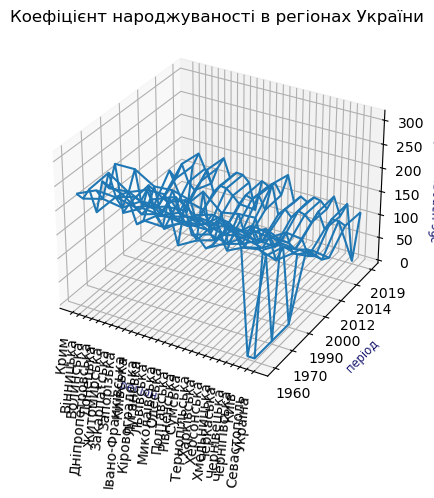

In [187]:

fig = plt.figure()
ax = fig.add_subplot(projection="3d")

xl = np.array(p1t1z['Регіон'])
yl = np.array(p1t1z.columns)[1:]
plt.xticks(ticks=np.arange(0, xl.shape[0]), labels=xl, rotation=85)
plt.yticks(ticks=np.arange(0, yl.shape[0]), labels=yl)
plt.xlabel('регіон', fontsize='small', color='midnightblue')
plt.ylabel('період', fontsize='small', color='midnightblue')
ax.set_zlabel('абс.народжуваність', fontsize='small', color='midnightblue')
plt.title('Коефіцієнт народжуваності в регіонах України', fontsize=12)

x, y = np.meshgrid(
    np.arange(0, xl.shape[0]), np.arange(1, yl.shape[0]))

ax.plot_wireframe(
                  x,
                  y,
                  p1t1z.to_numpy()[x, y],
                  )

plt.show()


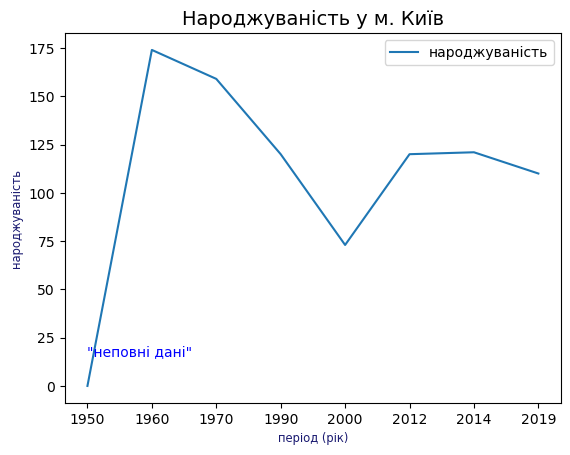

In [194]:
period = np.array(p1t1z.columns)[1:]
plt.plot(period, np.array(
    np.array(p1t1z[p1t1z['Регіон'] == 'Київ'].iloc[0][1:])), label='народжуваність')

plt.xlabel('період (рік)', fontsize='small', color='midnightblue')
plt.ylabel('народжуваність', fontsize='small', color='midnightblue')
plt.title('Народжуваність у м. Київ', fontsize=14)
plt.text(period[0], 15, '"неповні дані"', color="blue")
plt.legend()

plt.show()


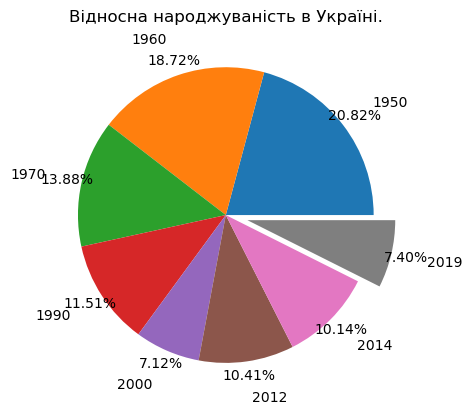

In [195]:
labels = np.array(p1t1z.columns)[1:]

data = np.array(p1t1z[p1t1z['Регіон'] == 'Україна'].iloc[0][1:])
explode = [0 for _ in p1t1z[p1t1z['Регіон'] == 'Україна']][:-2] + [0.15]
plt.pie(
    data,
    labels=labels,
    shadow=False,
    explode=explode,
    autopct="%.2f%%",
    pctdistance=1.10,
    labeldistance=1.25,
)

plt.title('Відносна народжуваність в Україні.', fontsize=12)
plt.show()


In [201]:
# Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
p1t1zm = p1t1z.replace(
                       to_replace=0,
                       value=np.nan,
                       inplace=False,
                       )
map_p1t1 = p1t1zm.isna()  # alias .isnull()
# print(map_p1t1)
print(np.sum(map_p1t1, axis=0))


Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64


In [203]:
# Видаліть з таблиці дані по всій країні, останній рядок таблиці
print(new_p1t1 := p1t1zm.drop(p1t1zm.shape[0]-1))


               Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0                Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2           Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4            Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120.0   79.0
6        Закарпатська  314.0  273.0  207.0   168   115   151  146.0  104.0
7          Запорізька  219.0  197.0  150.0   124    71   106  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122.0   88.0
9            Київська  204.0  189.0  156.0   123    73   122  121.0   80.0
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108.0   68.0
11          Луганська  262.0  235.0  144.0   116    62    96   51.0    NaN
12          Львівська  23

In [204]:
# Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
new_p1t1 = new_p1t1.fillna({key: new_p1t1[key].mean() for key in new_p1t1.columns[1:]})
# p1t1m1 = p1t1.fillna(p1t1.select_dtypes(include='number').mean(), inplace=False)
print(new_p1t1)

               Регіон    1950        1960   1970  1990  2000  2012    2014  \
0                Крим  230.00  206.000000  160.0   130    73   126  111.44   
1           Вінницька  224.00  192.000000  142.0   124    84   112  109.00   
2           Волинська  247.00  250.000000  179.0   153   112   148  141.00   
3    Дніпропетровська  204.00  204.000000  151.0   123    71   112  111.00   
4            Донецька  271.00  214.000000  140.0   109    61    98   82.00   
5         Житомирська  261.00  223.000000  159.0   129    89   122  120.00   
6        Закарпатська  314.00  273.000000  207.0   168   115   151  146.00   
7          Запорізька  219.00  197.000000  150.0   124    71   106  106.00   
8   Івано-Франківська  243.00  248.000000  182.0   155   103   124  122.00   
9            Київська  204.00  189.000000  156.0   123    73   122  121.00   
10     Кіровоградська  216.00  171.000000  145.0   126    79   110  108.00   
11          Луганська  262.00  235.000000  144.0   116    62    

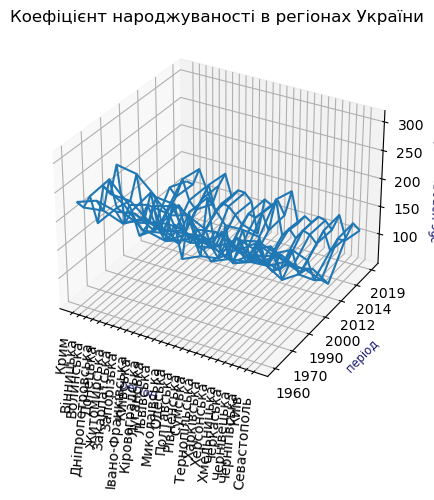

In [205]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

xl = np.array(new_p1t1['Регіон'])
yl = np.array(new_p1t1.columns)[1:]
plt.xticks(ticks=np.arange(0, xl.shape[0]), labels=xl, rotation=85)
plt.yticks(ticks=np.arange(0, yl.shape[0]), labels=yl)
plt.xlabel('регіон', fontsize='small', color='midnightblue')
plt.ylabel('період', fontsize='small', color='midnightblue')
ax.set_zlabel('абс.народжуваність', fontsize='small', color='midnightblue')
plt.title('Коефіцієнт народжуваності в регіонах України', fontsize=12)

x, y = np.meshgrid(
    np.arange(0, xl.shape[0]), np.arange(1, yl.shape[0]))

ax.plot_wireframe(
    x,
    y,
    new_p1t1.to_numpy()[x, y],
)

plt.show()


In [206]:
# Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
print(new_p1t1[new_p1t1['2019'] > new_p1t1['2019'].mean()]['Регіон'])


2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object


In [207]:
# У якому регіоні була найвища народжуваність у 2014 році?
print(new_p1t1[new_p1t1['2014'] == new_p1t1['2014'].max()]['Регіон'].iloc[0])


Рівненська


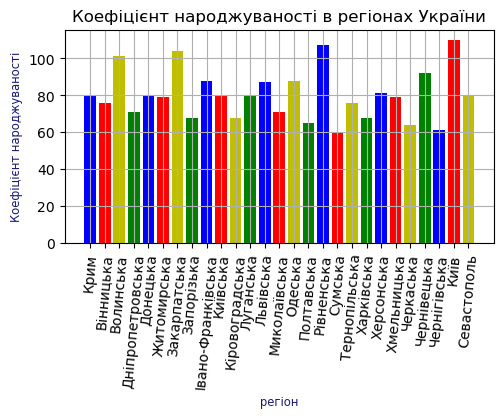

In [208]:
# Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році
colors = []
[colors.extend(['b', 'r', 'y', 'g'])
 for _ in range(len(new_p1t1['Регіон']) // 4 + 1)]
plt.bar(
    new_p1t1['Регіон'],
    new_p1t1['2019'],
    color=colors[:len(new_p1t1['Регіон'])]
    # angle=-0.5
)

plt.xlabel('регіон', fontsize='small', color='midnightblue')
plt.ylabel('Коефіцієнт народжуваності', fontsize='small', color='midnightblue')
plt.title('Коефіцієнт народжуваності в регіонах України', fontsize=12)
plt.xticks(rotation=85)
plt.grid(True)
plt.subplots_adjust(
    top=0.935,
    bottom=0.49,
    left=0.14,
    right=0.81,
    hspace=0.2,
    wspace=0.2
)
plt.show()
